In [64]:
!pip install spectral
from spectral import envi # load envi module

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [65]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive/MyDrive/test
!ls

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
[Errno 2] No such file or directory: '/gdrive/MyDrive/test'
/content
sample_data


In [66]:
file_name = r"/gdrive/MyDrive/test_RT.hdr" # or use 'os.listdir' to list files inside the folder
data = envi.open(file_name) # if .hdr and .raw has different name, use envi.open(HDR_NAME, RAW_NAME)

/usr/local/lib/python3.8/dist-packages/spectral/io/envi.py:175: UserWarning: Parameters with non-lowercase names encountered and converted to lowercase. To retain source file parameter name capitalization, set spectral.settings.envi_support_nonlowercase_params to True.
  warnings.warn(msg)


In [67]:
print(type(data))
print(data)

<class 'spectral.io.bilfile.BilFile'>
	Data Source:   '/gdrive/MyDrive/test_RT.raw'
	# Rows:            327
	# Samples:         640
	# Bands:           224
	Interleave:        BIL
	Quantization:  32 bits
	Data format:   float32


In [68]:
print(type(data.metadata['wavelength']))
print(data.metadata['wavelength'])

<class 'list'>
['935.610000', '939.060000', '942.520000', '945.980000', '949.430000', '952.890000', '956.350000', '959.810000', '963.270000', '966.730000', '970.190000', '973.650000', '977.110000', '980.580000', '984.040000', '987.510000', '990.970000', '994.430000', '997.900000', '1001.370000', '1004.830000', '1008.300000', '1011.770000', '1015.240000', '1018.710000', '1022.180000', '1025.650000', '1029.120000', '1032.590000', '1036.060000', '1039.530000', '1043.000000', '1046.480000', '1049.950000', '1053.430000', '1056.900000', '1060.380000', '1063.850000', '1067.330000', '1070.810000', '1074.290000', '1077.760000', '1081.240000', '1084.720000', '1088.200000', '1091.680000', '1095.170000', '1098.650000', '1102.130000', '1105.610000', '1109.100000', '1112.580000', '1116.070000', '1119.550000', '1123.040000', '1126.520000', '1130.010000', '1133.500000', '1136.990000', '1140.470000', '1143.960000', '1147.450000', '1150.940000', '1154.430000', '1157.930000', '1161.420000', '1164.910000'

In [69]:
np_data = data.asarray() # convert to numpy
print(type(np_data))
print(np_data.shape) # (row, sample, band)

<class 'numpy.memmap'>
(327, 640, 224)


In [70]:
!pip install matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


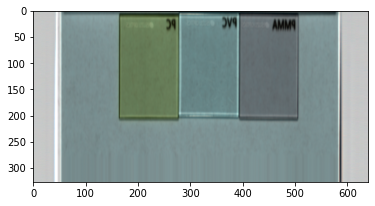

In [71]:
# show false-color image
import numpy as np

fig, ax = plt.subplots()

default_bands = [192, 134, 76] # index the (R, G, B)
false_color_data = np_data[..., default_bands]

# normalize data
d_max = np.max(false_color_data)
d_min = np.min(false_color_data)
normaled_data = (false_color_data - d_min) / (d_max - d_min)

ax.imshow(normaled_data) # view the single band and show as gray-scale image

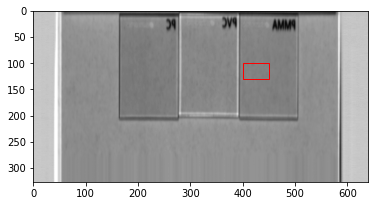

In [72]:
# show ROI
fig, ax = plt.subplots()
ax.imshow(np_data[..., 70], 'gray') # view the single band and show as gray-scale image

# ROI coordinates
x1, y1 = 400, 100
x2, y2 = 450, 130

ax.add_patch( # create a rectangle patch 
  patches.Rectangle( # ref: https://matplotlib.org/stable/api/_as_gen/matplotlib.patches.Rectangle.html
    (x1, y1),
    x2 - x1,
    y2 - y1,
    edgecolor='red',
    fill=False
  )
)

In [73]:
# slice data use coord
roi_data = np_data[y1:y2, x1:x2] # NOTICE!! you need swap the coordinates when slice data 
print(roi_data.shape)
print(roi_data)

(30, 50, 224)
[[[0.50000006 0.7208836  0.8000001  ... 0.4649164  0.44178477 0.44968805]
  [0.51591414 0.76219517 0.7593689  ... 0.4610319  0.43871766 0.4491518 ]
  [0.512012   0.73481774 0.774319   ... 0.45783707 0.4357383  0.44575867]
  ...
  [0.5039308  0.7516059  0.7752579  ... 0.46052346 0.4408147  0.463812  ]
  [0.5185477  0.73491377 0.7678572  ... 0.4575992  0.43660647 0.46010274]
  [0.5201263  0.7263158  0.72580636 ... 0.4562149  0.43363044 0.45886806]]

 [[0.5149701  0.68072295 0.74117655 ... 0.4662697  0.44540063 0.4532033 ]
  [0.5233161  0.72154474 0.7199212  ... 0.4610319  0.43871766 0.4491518 ]
  [0.527027   0.73481774 0.71595323 ... 0.45647588 0.43354756 0.44575867]
  ...
  [0.5196541  0.7516059  0.7752579  ... 0.46267477 0.44551507 0.46694517]
  [0.49486977 0.7780172  0.7083334  ... 0.45974788 0.4421053  0.4632484 ]
  [0.49644834 0.7894737  0.72580636 ... 0.45693505 0.43836266 0.45992005]]

 [[0.5149701  0.74096394 0.74117655 ... 0.4662697  0.4439543  0.4532033 ]
  [0.530

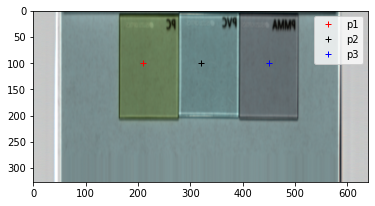

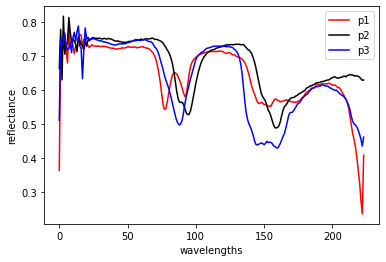

In [74]:
# any coordinate you want to plot
x1, y1 = 210, 100
x2, y2 = 320, 100
x3, y3 = 450, 100

# mark in false-color image
fig, ax = plt.subplots()
ax.imshow(normaled_data)
ax.plot(x1, y1, 'r+', label="p1")
ax.plot(x2, y2, 'k+', label="p2")
ax.plot(x3, y3, 'b+', label="p3")
ax.legend()


# index the spectral data
# NOTICE!! you need swap the coordinates when slice data
p1 = np_data[y1, x1]
p2 = np_data[y2, x2]
p3 = np_data[y3, x3]

# plot spectrum
fig, ax = plt.subplots()
ax.set_xlabel("wavelengths")
ax.set_ylabel("reflectance")
ax.plot(p1, 'r', label="p1")
ax.plot(p2, 'k', label="p2")
ax.plot(p3, 'b', label="p3")
ax.legend()

In [75]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as image
import urllib
import numpy as np

def SAM(x,y):
  val = np.dot(np.transpose(x), y)/(np.linalg.norm(x)*np.linalg.norm(y))
  return val

In [76]:
target_r1 = normaled_data[150][250][0]
target_g1 = normaled_data[150][250][1]
target_b1 = normaled_data[150][250][2]

target1 = np.array([target_r1,target_g1,target_b1])
SAM_target1 = np.full((normaled_data.shape[0],normaled_data.shape[1]), 0.0)

In [77]:
target_r2 = normaled_data[100][350][0]
target_g2 = normaled_data[100][350][1]
target_b2 = normaled_data[100][350][2]

target2 = np.array([target_r2,target_g2,target_b2])
SAM_target2 = np.full((normaled_data.shape[0],normaled_data.shape[1]), 0.0)

In [78]:
target_r3 = normaled_data[60][450][0]
target_g3 = normaled_data[60][450][1]
target_b3 = normaled_data[60][450][2]

target3 = np.array([target_r3,target_g3,target_b3])
SAM_target3 = np.full((normaled_data.shape[0],normaled_data.shape[1]), 0.0)

In [79]:
target_r4 = normaled_data[250][200][0]
target_g4 = normaled_data[250][200][1]
target_b4 = normaled_data[250][200][2]

target4 = np.array([target_r4,target_g4,target_b4])
SAM_target4 = np.full((normaled_data.shape[0],normaled_data.shape[1]), 0.0)

In [80]:
target_r5 = normaled_data[50][50][0]
target_g5 = normaled_data[50][50][1]
target_b5 = normaled_data[50][50][2]

target5 = np.array([target_r5,target_g5,target_b5])
SAM_target5 = np.full((normaled_data.shape[0],normaled_data.shape[1]), 0.0)

In [81]:
for i in range(normaled_data.shape[0]):
    for j in range(normaled_data.shape[1]):
        rgb = np.array([normaled_data[i][j][0], normaled_data[i][j][1], normaled_data[i][j][2]])
        img_res1 = SAM(rgb, target1)
        img_res2 = SAM(rgb, target2)
        img_res3 = SAM(rgb, target3)
        img_res4 = SAM(rgb, target4)
        img_res5 = SAM(rgb, target5)
        SAM_target1[i][j] = img_res1
        SAM_target2[i][j] = img_res2
        SAM_target3[i][j] = img_res3
        SAM_target4[i][j] = img_res4
        SAM_target5[i][j] = img_res5


[[0.99014324 0.99040854 0.99030536 ... 0.99120665 0.99146432 0.99095923]
 [0.99106514 0.99003291 0.99026889 ... 0.99020737 0.99053299 0.99041522]
 [0.99009866 0.99007428 0.99061877 ... 0.99117148 0.99116963 0.99028534]
 ...
 [0.99106008 0.99156392 0.99148518 ... 0.99020058 0.99017268 0.99035889]
 [0.99162334 0.99065721 0.99176174 ... 0.99045634 0.99005651 0.99001241]
 [0.99191779 0.99128997 0.98967856 ... 0.99049538 0.99046183 0.99068934]]


<function matplotlib.pyplot.show(*args, **kw)>

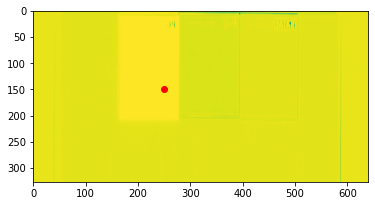

In [82]:
print(SAM_target1)
plt.figure()
plt.imshow(SAM_target1)
plt.plot(250, 150, "ro")
plt.show

[[0.99391866 0.99414665 0.99406391 ... 0.99429744 0.99342841 0.992755  ]
 [0.99389052 0.99304587 0.99340689 ... 0.99418569 0.99438798 0.99393213]
 [0.99326992 0.9936468  0.99419534 ... 0.9935379  0.99368161 0.99245149]
 ...
 [0.99402887 0.99356204 0.99377245 ... 0.99389189 0.99396294 0.99366045]
 [0.99384582 0.99340022 0.99381    ... 0.99295694 0.99255961 0.99320656]
 [0.99402374 0.99435753 0.99453092 ... 0.99335015 0.99318445 0.99356496]]


<function matplotlib.pyplot.show(*args, **kw)>

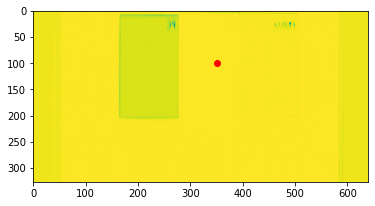

In [83]:
print(SAM_target2)
plt.figure()
plt.imshow(SAM_target2)
plt.plot(350, 100, "ro")
plt.show

[[0.9991771  0.99923074 0.99921268 ... 0.99918717 0.99884218 0.99863976]
 [0.99906695 0.9988572  0.99897695 ... 0.99926341 0.99929768 0.99915588]
 [0.99893999 0.99908525 0.9992252  ... 0.99892408 0.99897784 0.9985863 ]
 ...
 [0.99911612 0.99887806 0.99896705 ... 0.99916244 0.99919009 0.99906349]
 [0.99897277 0.99893421 0.99893826 ... 0.99878049 0.99865437 0.99892282]
 [0.99898756 0.99919528 0.99941909 ... 0.99893236 0.99887121 0.9989931 ]]


<function matplotlib.pyplot.show(*args, **kw)>

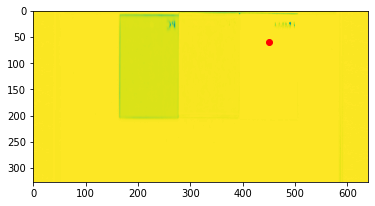

In [84]:
print(SAM_target3)
plt.figure()
plt.imshow(SAM_target3)
plt.plot(450, 60, "ro")
plt.show

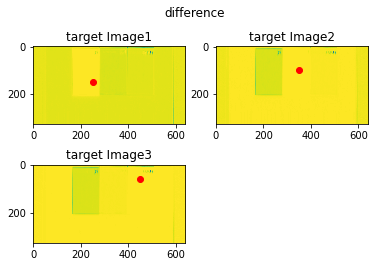

In [85]:
fig=plt.figure()
fig.suptitle("difference")

ax1 = fig.add_subplot(221)
ax1.title.set_text('target Image1')
plt.plot(250, 150, "ro")
ax1.imshow(SAM_target1,interpolation='nearest')

ax2 = fig.add_subplot(222)
ax2.title.set_text('target Image2')
plt.plot(350, 100, "ro")
ax2.imshow(SAM_target2,interpolation='nearest')

ax3 = fig.add_subplot(223)
ax3.title.set_text('target Image3')
plt.plot(450, 60, "ro")
ax3.imshow(SAM_target3,interpolation='nearest')
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

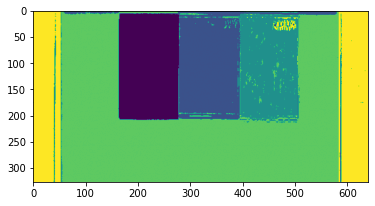

In [86]:
import numpy as np

target = np.full ((normaled_data.shape[0], normaled_data.shape[1]), 0.0)
#print(target)

for i in range (normaled_data.shape[0]):
    for j in range (normaled_data.shape[1]):
        target[i][j]=np.argmax([SAM_target1[i][j], SAM_target2[i][j], SAM_target3[i][j], SAM_target4[i][j], SAM_target5[i][j]] )


#print(target)
plt.figure()
plt.imshow(target)
plt.show

In [87]:
target[100]

array([4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 2., 2., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [88]:
for i in range(normaled_data.shape[0]):
    for j in range(normaled_data.shape[1]):
         if target[i, j] == 0:
            normaled_data[i, j] = [255,0,0]
         if target[i, j] == 1:
            normaled_data[i, j] = [0,255,0]
         if target[i, j] == 2:
            normaled_data[i, j] = [0,0,255]


<function matplotlib.pyplot.show(*args, **kw)>

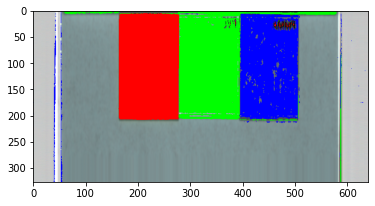

In [89]:
plt.imshow(normaled_data)
plt.show